Q1)(a)

We try to estimate the mean of p(y|x), since this minimizes the mean squared error of our predicitons w.r.to the true value of y.

Let the our prediciton be h, then MSE=$(Y-h)^{2}$.

E[$(Y-h)^{2}$|x]=E[$(Y-u+u-h)^{2}$|x], where u=E[Y|x]

=>E[$(Y-u)^{2}$|x]+E[$(u-h)^{2}$|x]+E[$(Y-u)(u-h)$|x]

Since the 3rd term is zero and 2nd term is greater than zero.

E[$(Y-h)^{2}$|x]$\geq$E[$(Y-u)^{2}$|x]


In [4]:
#Q.1)(b)
import numpy as np

class linear_regression:
    def __init__(self):
        self.weights = None
    def fit(self,X,y):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        self.weights = np.linalg.inv(X.T @ X) @ X.T @ y
    def predict(self,X):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        y_pred = X @ self.weights
        return y_pred

regressor = linear_regression()

#y=2*x
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8, 10])

regressor.fit(X, y)

X_test = np.array([[6], [7], [8]])
y_pred = regressor.predict(X_test)

print(y_pred)

#y=2*x+1

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([3, 5, 7, 9, 11])

regressor.fit(X, y)

X_test = np.array([[6], [7], [8]])
y_pred = regressor.predict(X_test)

print(y_pred)


[12. 14. 16.]
[13. 15. 17.]


When we model p(y|x) as a normal with mean w*x and stdev=I, then our answer which is the expectation is w*x, i.e. E[y|x]=w*x.

To find the weights, we take the maximum likelihood estimate of the gaussian which is nothing but maximimzing the negative log of the gaussian.

p(y|x)=$\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(y-u)^{2}}{2\sigma^{2}}}$

=>-log(p(y|x))=$log(\sqrt{2\pi}\sigma)$+$\frac{(y-u)^{2}}{2\sigma^{2}}$

So, maximizing taking sigma as I and maximizing this for u, involves minimzing the least squares term since the first term is independent of u, so the we get the value of weights as w=$(X^{T}X)^{-1}X^{T}Y$

### Parameterizing sigma
Since,the choice of σ does not directly affect the estimation of weights in linear regression, it doesn't affect our output,but it plays a significant role in influencing the model's confidence or uncertainty in its predictions.

Q1)(c)

An exponential family is represnted as follows:

p(y;n)=b(y)$e^{n^{T}T(y)-A(n)}$

where y=Data,n=natural paramter,T(y)=sufficient statistic(usaully taken as y),b(y)=base measure,A(n)=log-partition

Also dimension of y and n should match obviously.

So, I will consider a bernoulli distribution, p(y;a)=$a^{y}(1-a)^{1-y}$

This can be written as p(y;a)=$(\frac{a}{1-a})^{y}(1-a)$
=> $e^{ylog(\frac{a}{1-a})+log(1-a)}$

So,b(y)=1,T(y)=y,$n=log(\frac{a}{1-a})$,A(n)=log(1-a),n=natural parameter

So,a=$\frac{1}{1+e^{-n}}$


So,A(n)=log(1+$e^{n}$)

So,Using a generalized linear model on bernoulli for binary classfication, we have to use the following assumptions:

1)y|x;w-bernoulli(n)

2)n=$w^{T}$x

3)During testing, our predicition will be E[y|X=x;w], which according to properties of exp families is the partial derivative of A(n) w.r.to n which will be our hypothesis function h(x;w) which gives h(x;w)=$\frac{1}{1+e^{-n}}$

### So, what we are trying to estimate is the E[y|X=x;w] as modelled by the bernoulli.

So, we will build a binary classfication model commonly known as logistic regression, where p(y=1|x;w)=h(x;w)
and p(y=-1|x;w)=1-h(x;w) where h(x;w)=$\frac{1}{1+e^{-n}}$ and n=w*x

### Loss function
This involves maximizing the log of p(y|x;w).

So, log(p(y|x;w))= ylog(a)+(1-y)log(1-a) where a=$\frac{1}{1+e^{-n}}$ and n=w*x

So, taking the partial derivative w.r.to w we get,=>$\frac{y*a*(1-a)*x}{a}-\frac{(1-y)*a*(1-a)*x}{1-a}$

=> (y(1-a)-(1-y)a)x

=>(y-a)x

So, we need to the update rule w->w+$\alpha\frac{\sum{(y-a)x}}{n}$


In [78]:
import numpy as np
import math

class logistic_regression:
    def __init__(self,learning_rate,threshold,batch_size):
        self.weights = None
        self.alpha=learning_rate
        self.threshold=threshold
        self.n=batch_size
        
    def a(self,w,x):
        return (1/(1 + np.exp(-np.dot(w,x))))
    
    def fit(self,X,y):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        i=0
        self.weights=np.zeros(X[0].size)
        for k in range(math.floor(X.shape[0]/self.n)):
            update=0
            for j in range(self.n):
                update+=(y[i]-self.a(self.weights,X[i]))*X[i]
                i+=1
            update*=self.alpha
            update/=self.n
            self.weights+=update
        for k in range(i,X.shape[0]):
            update=0
            update+=(y[i]-self.a(self.weights,X[i]))*X[i]
            i+=1
        update*=self.alpha
        update/=(X.shape[0]-math.floor(X.shape[0]/self.n)*self.n)
        self.weights+=update
        
    def predict(self,X):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        y_pred=[]
        for i in range(X.shape[0]):
            y_pred.append(self.a(self.weights,X[i]))
            if(y_pred[i]>=self.threshold): y_pred[i]=1
            else: y_pred[i]=0
        return y_pred
        
#binary classification on numbers based on sign where positive is 1 and negative is 0

regressor = logistic_regression(0.1,0.5,10)

X=[]
y=[]
for x in range(-103,103,1):
    X.append([x])
    if(x>=0):y.append(1)
    else:y.append(0)
X=np.array(X)
y=np.array(y)

regressor.fit(X, y)

X_test=np.array([[-1],[50],[1000]])
y_pred = regressor.predict(X_test)

print(y_pred)

[0, 1, 1]


{'AA': 22.25770734371538, 'AB': 2.561655052276653, 'AC': 0.06245723680329383, 'BA': 32.73219379378796, 'BB': 5.039251499565334e-25, 'BC': 2.614081412966965, 'CA': 16.15674668223581, 'CB': 15.774197648433677, 'CC': 5.699794881411253}


<BarContainer object of 9 artists>

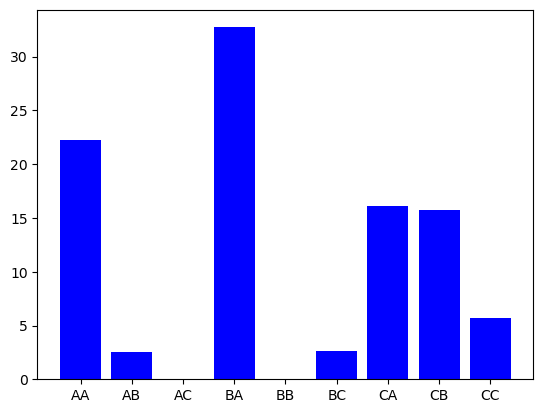

In [102]:
#Q.2)

import numpy as np
import csv
import sklearn
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
    
with open('train_set_A.csv','r') as csvfile:
    csvreader = csv.reader(csvfile)
    fields = next(csvreader)
    X_train_A=[]
    Y_train_A=[]
    for row in csvreader:
        X_train_A.append([float(row[0])])
        Y_train_A.append(float(row[1]))
X_train_A=np.array(X_train_A)
Y_train_A=np.array(Y_train_A)

with open('train_set_B.csv','r') as csvfile:
    csvreader = csv.reader(csvfile)
    fields = next(csvreader)
    X_train_B=[]
    Y_train_B=[]
    for row in csvreader:
        X_train_B.append([float(row[0])])
        Y_train_B.append(float(row[1]))
X_train_B=np.array(X_train_B)
Y_train_B=np.array(Y_train_B)

with open('train_set_C.csv','r') as csvfile:
    csvreader = csv.reader(csvfile)
    fields = next(csvreader)
    X_train_C=[]
    Y_train_C=[]
    for row in csvreader:
        X_train_C.append([float(row[0])])
        Y_train_C.append(float(row[1]))
X_train_C=np.array(X_train_C)
Y_train_C=np.array(Y_train_C)

regressorA = LinearRegression()
regressorB = LinearRegression()
regressorC = LinearRegression()

regressorA.fit(X_train_A,Y_train_A)
regressorB.fit(X_train_B,Y_train_B)
regressorC.fit(X_train_C,Y_train_C)

with open('test_set_A.csv','r') as csvfile:
    csvreader = csv.reader(csvfile)
    fields = next(csvreader)
    X_test_A=[]
    Y_test_A=[]
    for row in csvreader:
        X_test_A.append([float(row[0])])
        Y_test_A.append(float(row[1]))
X_test_A=np.array(X_test_A)
Y_test_A=np.array(Y_test_A)

with open('test_set_B.csv','r') as csvfile:
    csvreader = csv.reader(csvfile)
    fields = next(csvreader)
    X_test_B=[]
    Y_test_B=[]
    for row in csvreader:
        X_test_B.append([float(row[0])])
        Y_test_B.append(float(row[1]))
X_test_B=np.array(X_test_B)
Y_test_B=np.array(Y_test_B)

with open('test_set_C.csv','r') as csvfile:
    csvreader = csv.reader(csvfile)
    fields = next(csvreader)
    X_test_C=[]
    Y_test_C=[]
    for row in csvreader:
        X_test_C.append([float(row[0])])
        Y_test_C.append(float(row[1]))
X_test_C=np.array(X_test_C)
Y_test_C=np.array(Y_test_C)

Y_AA=regressorA.predict(X_test_A)
Y_AB=regressorA.predict(X_test_B)
Y_AC=regressorA.predict(X_test_C)
Y_BA=regressorB.predict(X_test_A)
Y_BB=regressorB.predict(X_test_B)
Y_BC=regressorB.predict(X_test_C)
Y_CA=regressorC.predict(X_test_A)
Y_CB=regressorC.predict(X_test_B)
Y_CC=regressorC.predict(X_test_C)

Y_mse={}
Y_mse["AA"]=mean_squared_error(Y_test_A,Y_AA)
Y_mse["AB"]=mean_squared_error(Y_test_B,Y_AB)
Y_mse["AC"]=mean_squared_error(Y_test_C,Y_AC)
Y_mse["BA"]=mean_squared_error(Y_test_A,Y_BA)
Y_mse["BB"]=mean_squared_error(Y_test_B,Y_BB)
Y_mse["BC"]=mean_squared_error(Y_test_C,Y_BC)
Y_mse["CA"]=mean_squared_error(Y_test_A,Y_CA)
Y_mse["CB"]=mean_squared_error(Y_test_B,Y_CB)
Y_mse["CC"]=mean_squared_error(Y_test_C,Y_CC)

print(Y_mse)
plt.bar(Y_mse.keys(), Y_mse.values(), color='b')

From the MSE data it is evident that B is the acutal data for both train and test.

Now, we will observe the deviation of train and test sets of A and C from B.

4.072440152071144
16.163588590175024


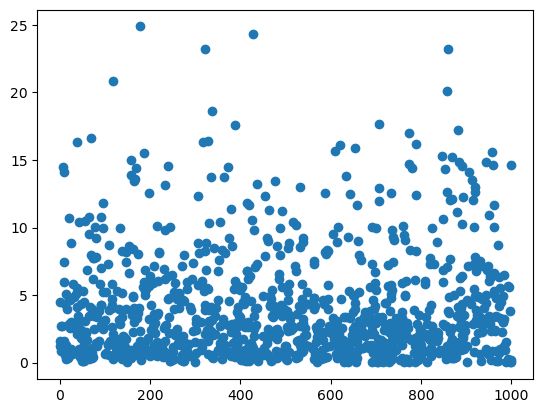

In [123]:
from sklearn.metrics import mean_absolute_error
import statistics as st
Z=Y_test_A.size
#A_test
E_A_X=[]
E_A_Y=[]
for i in range(Z):
    E_A_X.append(X_test_A[i])
    E_A_Y.append(abs(Y_test_A[i]-Y_test_B[i]))
    
print(st.mean(E_A_Y))
print(st.variance(E_A_Y))
plt.scatter(E_A_X,E_A_Y)

1.5973892469176583
0.06249149829630468


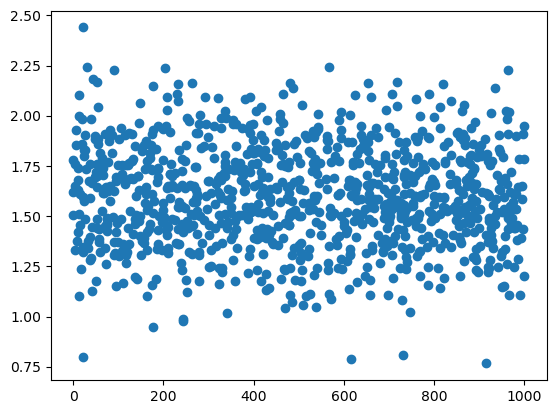

In [124]:
import statistics as st
#C_test
E_C_X=[]
E_C_Y=[]
for i in range(Z):
    E_C_X.append(X_test_C[i])
    E_C_Y.append(abs(Y_test_C[i]-Y_test_B[i]))
print(st.mean(E_C_Y))
print(st.variance(E_C_Y))
plt.scatter(E_C_X,E_C_Y)

3.9999853189818153
16.146120393997833


(array([481., 251., 128.,  62.,  33.,  23.,  13.,   5.,   2.,   2.]),
 array([1.64809231e-03, 2.62513895e+00, 5.24862982e+00, 7.87212068e+00,
        1.04956115e+01, 1.31191024e+01, 1.57425933e+01, 1.83660841e+01,
        2.09895750e+01, 2.36130659e+01, 2.62365567e+01]),
 <BarContainer object of 10 artists>)

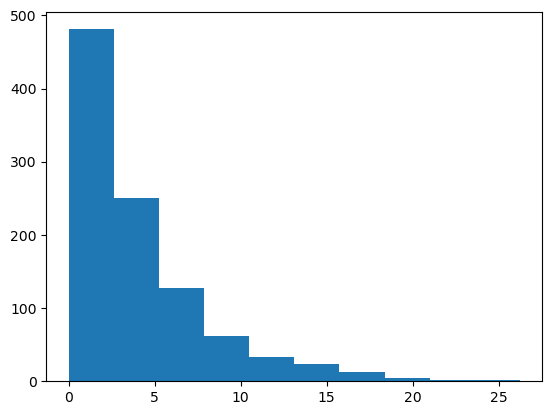

In [146]:
import statistics as st
#C_train
E_C_X=[]
E_C_Y=[]
for i in range(Z):
    E_C_X.append(X_train_C[i])
    E_C_Y.append(abs(Y_train_C[i]-Y_train_B[i]))
print(st.mean(E_C_Y))
print(st.variance(E_C_Y))
plt.hist(E_C_Y)

1.5967922155987488
0.06254955280734474


(array([  9.,  40.,  84., 148., 215., 231., 144.,  89.,  30.,  10.]),
 array([0.88268606, 1.02616359, 1.16964111, 1.31311864, 1.45659616,
        1.60007369, 1.74355121, 1.88702874, 2.03050626, 2.17398379,
        2.31746131]),
 <BarContainer object of 10 artists>)

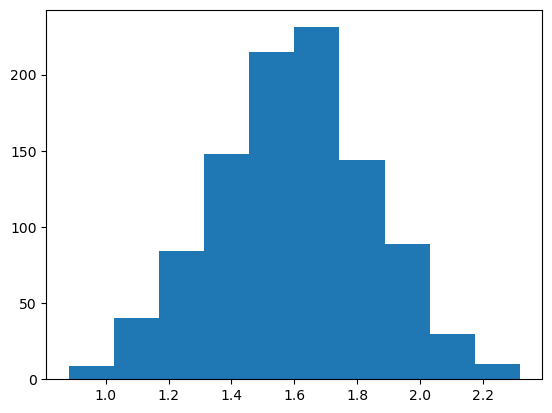

In [142]:
import statistics as st
#A_train
E_A_X=[]
E_A_Y=[]
for i in range(Z):
    E_A_X.append(X_train_A[i])
    E_A_Y.append(abs(Y_train_A[i]-Y_train_B[i]))
print(st.mean(E_A_Y))
print(st.variance(E_A_Y))
plt.hist(E_A_Y)

As we can see the distribution of A train is close to C test and C train is close to A test, as for the distributions we can see that C_train is the exponential(4) since the variance is square of mean and histogram shows this and A_train is a gaussian with paramaters roughly (1.6,0.625).

In [363]:
#Q3
import numpy as np
import math
import time

class logistic_regression_grad:
    def __init__(self,learning_rate,threshold):
        self.weights = None
        self.alpha=learning_rate
        self.threshold=threshold
        
    def a(self,w,x):
        return (1/(1 + np.exp(-np.dot(w,x))))
    
    def fit(self,X,y):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        self.weights=np.zeros(X[0].size)
        update=[1e9]*X[0].size
        itr=0
        start=time.time()
        while(abs(sum(update)/X[0].size)>2*1e-5):
            update=0
            for i in range(X.shape[0]):
                update+=(y[i]-self.a(self.weights,X[i]))*X[i]
            update/=X.shape[0]
            update*=self.alpha
            self.weights+=update
            itr+=1
        end=time.time()
        return itr,end-start
        
    def predict(self,X):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        y_pred=[]
        for i in range(X.shape[0]):
            y_pred.append(self.a(self.weights,X[i]))
            if(y_pred[i]>=self.threshold): y_pred[i]=1
            else: y_pred[i]=0
        return y_pred
    
class logistic_regression_fisher:
    def __init__(self,threshold):
        self.weights = None
        self.threshold=threshold
        
    def a(self,w,x):
        return (1/(1 + np.exp(-np.dot(w,x))))
    
    def fit(self,X,y):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        self.weights=np.zeros(X[0].size)
        update=[-1e9]*X[0].size
        itr=0
        start=time.time()
        while(abs(sum(update)/X[0].size)>2*1e-5):
            update=0
            for i in range(X.shape[0]):
                update+=(y[i]-self.a(self.weights,X[i]))*X[i]
            update/=X.shape[0]
            update=np.array(update)
            hessian=np.zeros((X[0].size,X[0].size))
            for i in range(X.shape[0]):
                d=self.a(self.weights,X[i])
                d=d*(1-d)
                hessian+=d*np.outer(X[i],X[i])
            hessian/=X.shape[0]
            if(hessian.max()==0):break
            update=np.dot(np.linalg.inv(hessian),update)
            self.weights-=update
            itr+=1
        end=time.time()
        return itr,end-start
        
    def predict(self,X):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        y_pred=[]
        for i in range(X.shape[0]):
            y_pred.append(self.a(self.weights,X[i]))
            if(y_pred[i]>=self.threshold): y_pred[i]=1
            else: y_pred[i]=0
        return y_pred
    
def a(w,x):
        return (1/(1 + np.exp(-np.dot(w,x))))

#Generating the dataset
def dataset(dim, points):
    x=np.random.normal(0,1/math.sqrt(points), (points,dim))
    fac = np.random.normal(0, 1/math.sqrt(points), (dim,1))
    y = np.random.binomial(1, a(x,fac))
        
    return x, y
X_train,Y_train=dataset(10,100)
X_test,Y_test=dataset(10,10)

In [364]:
regressor_grad=logistic_regression_grad(0.1,0.5)
regressor_fish=logistic_regression_fisher(0.5)

itr_grad,time_grad=regressor_grad.fit(X_train,Y_train)
itr_fish,time_fish=regressor_fish.fit(X_train,Y_train)

C:\Users\shory\AppData\Local\Temp\ipykernel_6560\1686702027.py:47: RuntimeWarning: overflow encountered in exp
  return (1/(1 + np.exp(-np.dot(w,x))))


In [365]:
print(itr_grad,time_grad)
print(itr_fish,time_fish)

65 0.1314859390258789
6 0.018940448760986328


In [366]:
Y_test_grad=regressor_grad.predict(X_test)
Y_test_fish=regressor_fish.predict(X_test)

acc_grad=0
acc_fish=0
for i in range(Y_test.size):
    if(Y_test[i]==Y_test_grad[i]):acc_grad+=1
    if(Y_test[i]==Y_test_fish[i]):acc_fish+=1
print(acc_grad,acc_fish)

7 6


C:\Users\shory\AppData\Local\Temp\ipykernel_6560\1686702027.py:47: RuntimeWarning: overflow encountered in exp
  return (1/(1 + np.exp(-np.dot(w,x))))


Well as we can the model have similar accuracy obviously for same threshold for stopping training, But if we compare the number of iterations, needed fisher method needs less than grad descent, this is obvious since, fisher method has quadratic convergence while grad desecent has linear order convergence, but the tradeoff is that the runtime and memory overhead of Fisher/NR method per iteration is more than grad descent since we need to compute the hessian, so the order of operations in grad descent is O($n^{2}$) while in Fisher it is O($n^{3}$)

Q4)

A flexible method usually has less assumptions i.e low bias and high vairance eg-decision trees, whereas an inflexible method has a high bias and low variance eg-linear regression. As to which method performs better depends on the specific task and shouldn't be judged in advance, but generally speaking data in the real world is usaully complex and cannot be generalized by an inflexible method(underfitting), so, flexible methods generally perform well. Though our goal should always be to find the sweet spot between the $bias^{2}$ and variance tradeoff which minimizes the training error and the distance between the training and test error, going with a highly flexible method can lead to overfitting wherein our model does better during training but fails to generalize.

(a)A flexible method will perform better here, Since the amount of data is large, chances of noise even in case of simple relationships are large, an inflexible method in this case will fail to capture the features of the data and underfit, This can also be shown using vc dimension, where a flexible method has much more capacity and can represent more combinations of data than an inflexible method and thus, will more likely converge closer to the actual function.

(b) If the amount of data is small, then an inflexible method does better, since the flexible method can overfit the data and the noise in the data comepletely, and do bad at generalizing the features of the data, thus, doing bad when testing. More formally, an flexible method's vc dim is high, and much more likely to shatter the set of combinations of possible outputs with small data, so it will completley fit the data but it will not generalize well to test data.

(c) If the relationship is already highly non linear to begin with, then an flexible method will do well, since highly non linear functions are flexible and complex in nature, and thus can't be represented by an inflexible method